# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



## tf.data.datasets

In [61]:
#!pip install tensorflow_datasets

In [62]:
import tensorflow as tf 
import tensorflow_datasets as tfds

In [63]:
builders = tfds.list_builders() 
print(builders)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bucc', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar100_n', 'cifar10_1', 'cifar10_corrupted', 'cifar10_n', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'conll2003', 'controlled_noisy_web_labels', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'criteo', 'cs_restaur

In [64]:
data, info = tfds.load('mnist', with_info=True)
train_data, test_data = data['train'], data['test']

In [65]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\USER\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }"

## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [66]:
import numpy as np

In [67]:
num_items = 20
num_list = np.arange(num_items)
#num_list = [[i, i+1] for i in num_list]

In [68]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [69]:
num_list_dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [70]:
for item in num_list_dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)


### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [71]:
import itertools

def gen():
    for i in itertools.count(1):
        yield (i, [1]*i)

dataset = tf.data.Dataset.from_generator(
    gen,
    (tf.int64, tf.int64),
    (tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(3).as_numpy_iterator())

[(1, array([1], dtype=int64)),
 (2, array([1, 1], dtype=int64)),
 (3, array([1, 1, 1], dtype=int64))]

In [72]:
list(dataset.take(3).as_numpy_iterator())

[(1, array([1], dtype=int64)),
 (2, array([1, 1], dtype=int64)),
 (3, array([1, 1, 1], dtype=int64))]

In [73]:
import itertools
def gen():
    for i in itertools.count(1):
        yield (i, [1]*i)

k = 0
for j in gen():
    print(j)
    if k > 3:
        break
    k += 1

(1, [1])
(2, [1, 1])
(3, [1, 1, 1])
(4, [1, 1, 1, 1])
(5, [1, 1, 1, 1, 1])


In [74]:
# for item in dataset:
#     print(item)

In [75]:
def gen(stop):
    for i in itertools.count(1):
        if i < stop:
            yield (i, [1]*i)

dataset = tf.data.Dataset.from_generator(
    gen, 
    args=[10],
    output_types = (tf.int64, tf.int64),
    output_shapes = (tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(9).as_numpy_iterator())


[(1, array([1], dtype=int64)),
 (2, array([1, 1], dtype=int64)),
 (3, array([1, 1, 1], dtype=int64)),
 (4, array([1, 1, 1, 1], dtype=int64)),
 (5, array([1, 1, 1, 1, 1], dtype=int64)),
 (6, array([1, 1, 1, 1, 1, 1], dtype=int64)),
 (7, array([1, 1, 1, 1, 1, 1, 1], dtype=int64)),
 (8, array([1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)),
 (9, array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))]

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [76]:
dataset = num_list_dataset.repeat(3).batch(7)

In [77]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int32)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int32)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int32)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int32)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int32)


In [78]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder=True)

In [79]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int32)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int32)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int32)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int32)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [80]:
from tensorflow.data import Dataset

In [81]:
dataset = Dataset.range(1, 6)
dataset = dataset.map(lambda x: x * 2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [84]:
dataset = Dataset.range(5)

result = dataset.map(lambda x: x + 1)

result

list(result.as_numpy_iterator())

[1, 2, 3, 4, 5]

In [85]:
elements = [(1, 'one'), (2, 'two'), (3, 'three')]
dataset = Dataset.from_generator(lambda: elements, (tf.int32, tf.string))

result = dataset.map(lambda x_int, y_str: x_int)
list(result.as_numpy_iterator())


[1, 2, 3]

In [86]:
dataset = Dataset.range(3)

def g(x):
    return tf.constant(10.5), tf.constant(["One", "Two", "Three"])

result = dataset.map(g)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

In [89]:
def h(x):
    return 10.5, ['One','Two','Three'], np.array([1.0, 2.0], dtype=np.float64)

result = dataset.map(h)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [95]:
def i(x):
    return (10.5, [12, 11]), "One", "Two"

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.int32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [96]:
dataset = Dataset.from_tensor_slices([1,2,3])
dataset = dataset.filter(lambda x: x < 3)

list(dataset.as_numpy_iterator())

[1, 2]

In [102]:
dataset = Dataset.from_tensor_slices([1,2,3,4,5,6,7,8,9,10])
dataset = dataset.filter(lambda x: x < 3)

list(dataset.as_numpy_iterator())

[1, 2]

In [100]:
dataset = Dataset.from_tensor_slices([1,0,1,1,0,1,0,1])
dataset = dataset.filter(lambda x: x == 1)

list(dataset.as_numpy_iterator())

[1, 1, 1, 1, 1]

In [104]:
#dataset = Dataset.from_tensor_slices([1,0,1,1,0,1,0,1])
dataset = Dataset.from_tensor_slices([1,2,3,4,5,6,7,8,9,10])

def filter_fn(x):
    return tf.math.equal(x, 1)

dataset = dataset.filter(filter_fn)
list(dataset.as_numpy_iterator())

[1]

### shuffle, take

In [105]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)


Dl Completed...: 100%|██████████| 1/1 [00:34<00:00, 34.77s/ url]
                                                                        

Dataset imdb_reviews downloaded and prepared to C:\Users\USER\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [110]:
train_dataset = dataset['train']
train_dataset = train_dataset.batch(5).shuffle(5).take(2)

for data in train_dataset:
    print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'It was disgusting and painful. What a waste of a cast! I swear, the audience (1/2 full) laughed TWICE in 90 minutes. This is not a lie. Do not even rent it.<br /><br />Zeta Jones was just too mean to be believable.<br /><br />Cusack was OK. Just OK. I felt sorry for him (the actor) in case people remember this mess.<br /><br />Roberts was the same as she always is. Charming and sweet, but with no purpose. The "romance" with John was completely unbelievable.',
       b'This is a straight-to-video movie, so it should go without saying that it\'s not going to rival the first Lion King, but that said, this was downright good.<br /><br />My kids loved this, but that\'s a given, they love anything that\'s a cartoon. The big shock was that *I* liked it too, it was laugh out loud funny at some parts (even the fart jokes*), had lots of rather creative tie-ins with the first movie, and even some jokes that you had to be older to understand (

### get_next()

In [111]:
dataset = Dataset.range(2)
for element in dataset:
    print(element)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [114]:
dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())


<RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [121]:
a = np.random.randint(0, 10, size=(2,3))
print(a)

dataset = Dataset.from_tensor_slices(a)
iterator = iter(dataset)

print(iterator.get_next())
print(iterator.get_next())


[[8 7 3]
 [5 9 9]]
tf.Tensor([8 7 3], shape=(3,), dtype=int32)
tf.Tensor([5 9 9], shape=(3,), dtype=int32)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [141]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')

import tensorflow as tf 
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model 
from tensorflow.keras.datasets.fashion_mnist import load_data

### 데이터 로드

In [123]:
(x_train, y_train), (x_test, y_test) = load_data()

In [124]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 전처리

In [125]:
x_train = x_train / 255.
x_test = x_test / 255.

### tf.data 이용

In [130]:
train_ds = Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [131]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat', 'Sandle','Shirt','Sneaker','Bag','Ankle boot']

### 데이터 확인

(32, 28, 28) (32,)


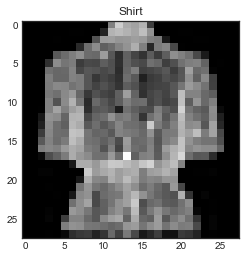

(32, 28, 28) (32,)


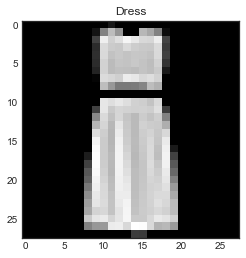

(32, 28, 28) (32,)


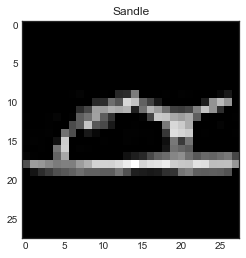

(32, 28, 28) (32,)


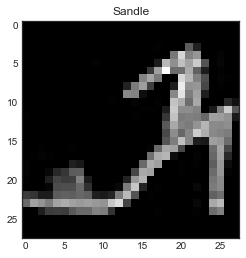

(32, 28, 28) (32,)


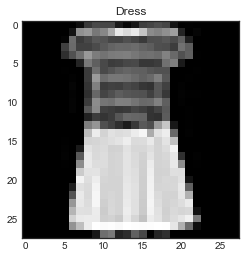

In [140]:
for image, label in train_ds.take(5):
    print(image.shape, label.shape)
    plt.title('{}'.format(class_names[label[0]]))
    plt.imshow(image[0, :, :], cmap='gray')
    plt.show()

### 모델 생성
- 임의의 모델

In [144]:
def build_model():
    input = Input(shape=(28,28), name='input')
    flatten = Flatten(input_shape=[28,28], name='flatten')(input)
    hidden1 = Dense(256, kernel_initializer='he_normal', name='hidden1')(flatten)
    hidden1 = BatchNormalization()(hidden1)
    hidden1 = Activation('relu')(hidden1)
    dropout1 = Dropout(0.5)(hidden1)
    
    hidden2 = Dense(100, kernel_initializer='he_normal', name='hidden2')(dropout1)
    hidden2 = BatchNormalization()(hidden2)
    hidden2 = Activation('relu')(hidden2)
    dropout2 = Dropout(0.5)(hidden2)
    
    hidden3 = Dense(100, kernel_initializer='he_normal', name='hidden3')(dropout2)
    hidden3 = BatchNormalization()(hidden3)
    hidden3 = Activation('relu')(hidden3)
    dropout3 = Dropout(0.5)(hidden3)

    hidden4 = Dense(50, kernel_initializer='he_normal', name='hidden4')(dropout3)
    hidden4 = BatchNormalization()(hidden4)
    hidden4 = Activation('relu')(hidden4)
    dropout4 = Dropout(0.5)(hidden4)

    output = Dense(10, activation='softmax', name='output')(dropout4)
    
    model = Model(inputs=[input], outputs=[output])
    
    return model
    

In [145]:
model = build_model()

In [146]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                           

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [149]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [150]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


### 모델 학습

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


In [154]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels, predictions)
    

In [155]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    loss = loss_object(labels, predictions)
    
    test_loss(loss)
    test_accuracy(labels, predictions)

In [156]:
epochs = 20

for epoch in range(epochs):
    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)
        
    template = 'Epochs {:3d}\tLoss: {:.4f}\tAccuracy: {:.4f}\tTest Loss: {:.4f}\tTest Accuracy: {:.4f}\t'
    print(template.format(epoch+1,
                          train_loss.result(),
                          train_accuracy.result()*100,
                          test_loss.result(),
                          test_accuracy.result()*100))


Epochs   1	Loss: 0.4912	Accuracy: 82.3067	Test Loss: 0.4178	Test Accuracy: 84.6400	
Epochs   2	Loss: 0.4303	Accuracy: 84.4242	Test Loss: 0.4042	Test Accuracy: 85.3650	
Epochs   3	Loss: 0.3994	Accuracy: 85.4678	Test Loss: 0.3901	Test Accuracy: 85.8600	
Epochs   4	Loss: 0.3776	Accuracy: 86.1967	Test Loss: 0.3790	Test Accuracy: 86.1975	
Epochs   5	Loss: 0.3616	Accuracy: 86.7363	Test Loss: 0.3819	Test Accuracy: 86.1780	
Epochs   6	Loss: 0.3480	Accuracy: 87.1931	Test Loss: 0.3763	Test Accuracy: 86.3817	
Epochs   7	Loss: 0.3369	Accuracy: 87.5926	Test Loss: 0.3732	Test Accuracy: 86.5486	
Epochs   8	Loss: 0.3271	Accuracy: 87.9448	Test Loss: 0.3690	Test Accuracy: 86.7863	
Epochs   9	Loss: 0.3183	Accuracy: 88.2467	Test Loss: 0.3645	Test Accuracy: 86.9867	
Epochs  10	Loss: 0.3106	Accuracy: 88.5158	Test Loss: 0.3624	Test Accuracy: 87.0920	
Epochs  11	Loss: 0.3033	Accuracy: 88.7617	Test Loss: 0.3594	Test Accuracy: 87.2527	
Epochs  12	Loss: 0.2965	Accuracy: 89.0037	Test Loss: 0.3571	Test Accuracy: 8

### 모델 학습 : 2번째 방법 (Keras)

5~6분 소요

### 모델 평가

### 결과 확인

### Test Batch Dataset